In [1]:
import sys
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
sys.path.append("../gotmtool")
from gotmtool import *

In [2]:
dataroot = '../Forcing_entire_cruise2'
filename1 = '1D_SD_ERA5_input_2.mat'
filename2 = 'puturbation_data.mat'

In [3]:
dat_org = sio.loadmat(os.path.join(dataroot, filename1))
dat_ptb = sio.loadmat(os.path.join(dataroot, filename2))

In [4]:
dat_org

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Sep 11 03:25:43 2021',
 '__version__': '1.0',
 '__globals__': [],
 'ERA5_met': array([[(array([[31.02118056],
                [31.06284722],
                [31.10451389],
                ...,
                [84.43784722],
                [84.47951389],
                [84.52118056]]), array([[-14.23833345],
                [-12.06615976],
                [ -7.48580267],
                ...,
                [  8.97573651],
                [  9.42343643],
                [  9.20787721]]), array([[-11.72048145],
                [ -9.84770285],
                [ -5.95017074],
                ...,
                [ -4.87515277],
                [ -5.03014134],
                [ -5.05597277]]), array([[-90.87928855],
                [-94.10734639],
                [-95.45779486],
                ...,
                [-51.92340535],
                [-64.75593158],
                [-85.57889728]]), array([[1056.83626951]

In [5]:
dat_ptb

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Aug 31 17:19:50 2021',
 '__version__': '1.0',
 '__globals__': [],
 'diff_sf_lhf_16km': array([[ 0.47263835],
        [ 0.06871145],
        [ 0.05358397],
        ...,
        [ 0.77556273],
        [ 0.88454102],
        [-2.60155295]]),
 'diff_sf_shf_16km': array([[ 0.35784759],
        [ 0.03897248],
        [ 0.09014996],
        ...,
        [ 0.90142606],
        [ 0.97987117],
        [-2.59263823]]),
 'diff_sf_slp_16km': array([[0.14039021],
        [0.15527455],
        [0.16764372],
        ...,
        [0.02062809],
        [0.02558687],
        [0.05895812]]),
 'diff_sf_sst_16km': array([[ 0.01741634],
        [-0.00770419],
        [ 0.01718032],
        ...,
        [ 0.01361647],
        [-0.00493304],
        [-0.00900656]]),
 'diff_sf_tair_16km': array([[ 0.00993372],
        [ 0.00377633],
        [-0.00467843],
        ...,
        [-0.04717146],
        [-0.0503818 ],
        [-0.05468698]]),
 '

In [6]:
era5_met = dat_org['ERA5_met'][0,0]
sd_met = dat_org['SD_met'][0,0]
keys = [v[0] for v in era5_met.dtype.descr]
print(keys)

['time', 'qlat', 'qsens', 'lw', 'sw', 'precip', 'tau', 'U', 'Udir']


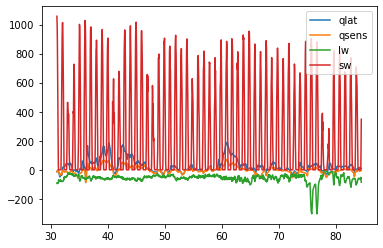

In [8]:
for key in ['qlat', 'qsens', 'lw', 'sw']:
    plt.plot(era5_met['time'], era5_met[key], label=key)
plt.legend()

In [10]:
case_start = {
    'C1': 35,
    'C4': 48.6,
    'C5': 53.5,
    'C6': 57.2,
    'C7': 63,
    'C8': 71.8,
    'P1': 36,
    'P2': 38.2,
    'P3': 42,
    'P4': 43.2,
    'P5': 45.1,
    'P6': 54,
    'P7': 56,
    'P8': 60,
    }
case_end = {
    'C1': 36,
    'C4': 49.3,
    'C5': 54,
    'C6': 58,
    'C7': 64,
    'C8': 72.2,
    'P1': 37.5,
    'P2': 40.8,
    'P3': 43,
    'P4': 45,
    'P5': 46,
    'P6': 55,
    'P7': 57,
    'P8': 63,
    }
idx_start_ptb = {}
idx_end_ptb = {}
idx_start_smt = {}
idx_end_smt = {}
time_ptb = dat_ptb['diff_sf_time']
time_smt = era5_met['time']
for key in case_start.keys():
    print(key)
    i = np.argmin(np.abs(time_ptb-case_start[key]))
    idx_start_ptb[key] = i
    j = np.argmin(np.abs(time_ptb-case_end[key]))
    idx_end_ptb[key] = j
    print('start: idx = {}, time = {}'.format(i, time_ptb[i]))
    print('end: idx = {}, time = {}'.format(j, time_ptb[j]))
for key in case_start.keys():
    print(key)
    i = np.argmin(np.abs(time_smt-case_start[key]))
    idx_start_smt[key] = i
    j = np.argmin(np.abs(time_smt-case_end[key]))
    idx_end_smt[key] = j
    print('start: idx = {}, time = {}'.format(i, time_smt[i]))
    print('end: idx = {}, time = {}'.format(j, time_smt[j]))

C1
start: idx = 5729, time = [35.]
end: idx = 7169, time = [36.]
C4
start: idx = 25313, time = [48.6]
end: idx = 26321, time = [49.3]
C5
start: idx = 32369, time = [53.5]
end: idx = 33089, time = [54.]
C6
start: idx = 37697, time = [57.2]
end: idx = 38849, time = [58.]
C7
start: idx = 46049, time = [63.]
end: idx = 47489, time = [64.]
C8
start: idx = 58721, time = [71.8]
end: idx = 59297, time = [72.2]
P1
start: idx = 7169, time = [36.]
end: idx = 9329, time = [37.5]
P2
start: idx = 10337, time = [38.2]
end: idx = 14081, time = [40.8]
P3
start: idx = 15809, time = [42.]
end: idx = 17249, time = [43.]
P4
start: idx = 17537, time = [43.2]
end: idx = 20129, time = [45.]
P5
start: idx = 20273, time = [45.1]
end: idx = 21569, time = [46.]
P6
start: idx = 33089, time = [54.]
end: idx = 34529, time = [55.]
P7
start: idx = 35969, time = [56.]
end: idx = 37409, time = [57.]
P8
start: idx = 41729, time = [60.]
end: idx = 46049, time = [63.]
C1
start: idx = 95, time = [34.97951389]
end: idx = 119

(77076, 1)


Text(0, 0.5, '$\\Delta $SHF + $\\Delta$LHF (W m$^{-2}$)')

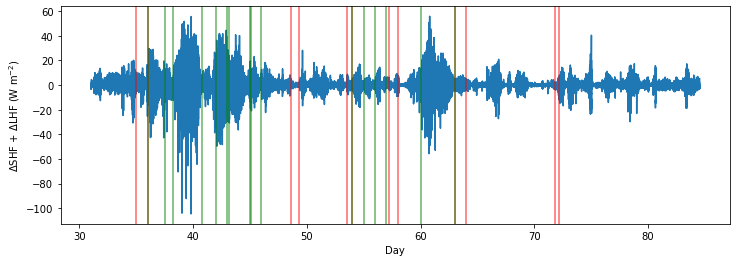

In [11]:
hf_ptb = - (dat_ptb['diff_sf_lhf_16km'] + dat_ptb['diff_sf_shf_16km'])
print(hf_ptb.shape)
fig = plt.figure(figsize=[12,4])
plt.plot(time_ptb, hf_ptb)
for key in case_start.keys():
    if key.startswith('C'):
        color = 'r'
    elif key.startswith('P'):
        color = 'g'
    plt.axvline(x=case_start[key], color=color, alpha=0.6)
    plt.axvline(x=case_end[key], color=color, alpha=0.6)
plt.xlabel('Day')
plt.ylabel('$\Delta $SHF + $\Delta$LHF (W m$^{-2}$)')

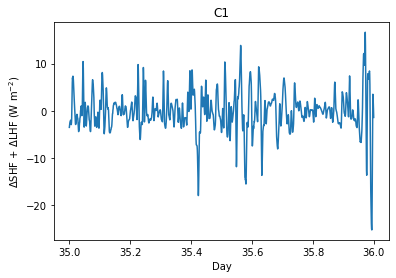

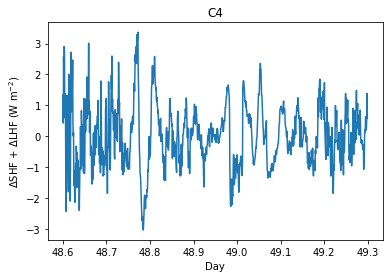

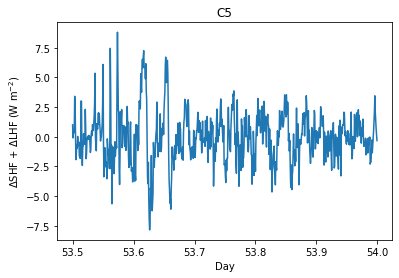

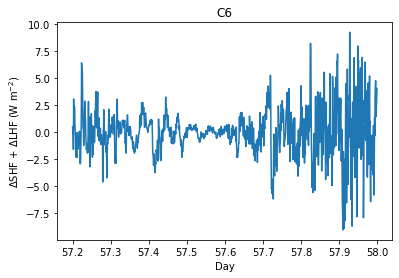

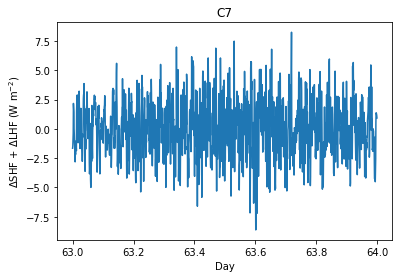

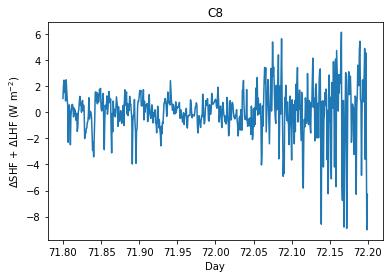

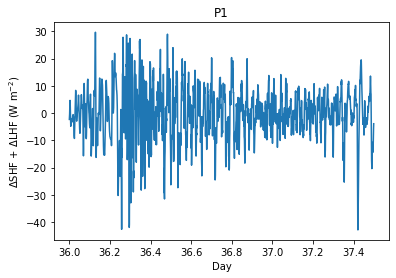

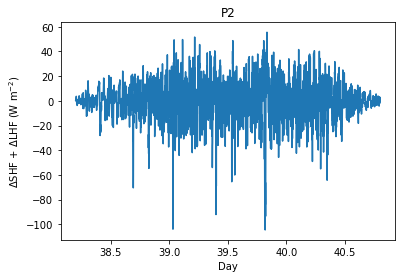

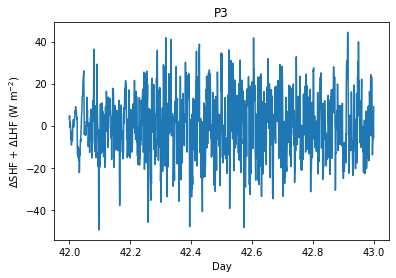

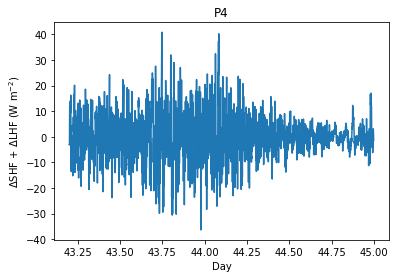

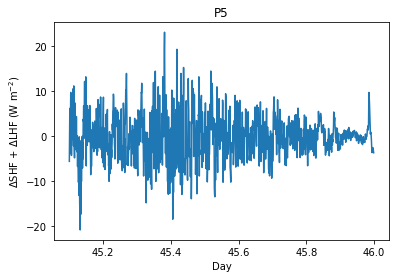

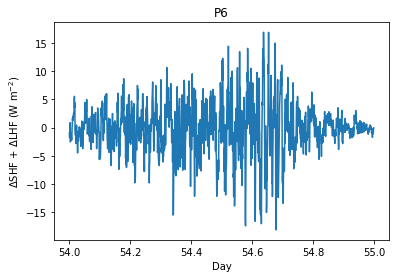

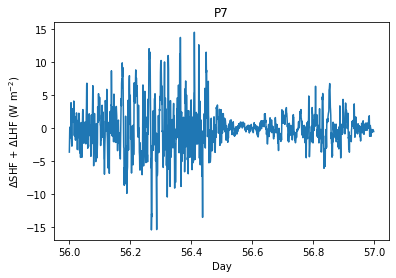

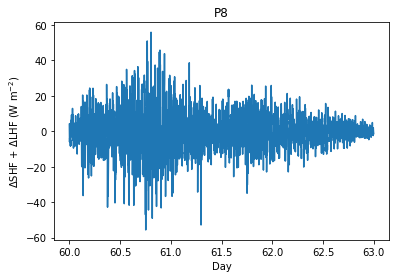

In [12]:
for key in case_start.keys():
    fig = plt.figure()
    plt.plot(time_ptb[idx_start_ptb[key]:idx_end_ptb[key]], hf_ptb[idx_start_ptb[key]:idx_end_ptb[key]])
    plt.xlabel('Day')
    plt.ylabel('$\Delta $SHF + $\Delta$LHF (W m$^{-2}$)')
    plt.title(key)

(1285, 1)


Text(0, 0.5, 'SHF + LHF + LW (W m$^{-2}$)')

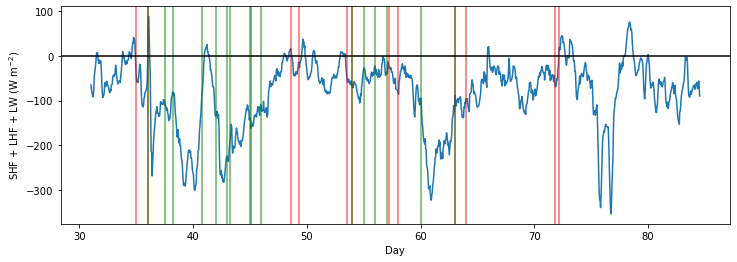

In [13]:
hf_smt =  -(era5_met['qsens'] + era5_met['qlat']) + era5_met['lw']
print(hf_smt.shape)
fig = plt.figure(figsize=[12,4])
plt.plot(time_smt, hf_smt)
for key in case_start.keys():
    if key.startswith('C'):
        color = 'r'
    elif key.startswith('P'):
        color = 'g'
    plt.axvline(x=case_start[key], color=color, alpha=0.6)
    plt.axvline(x=case_end[key], color=color, alpha=0.6)
plt.axhline(y=0, color='k')
plt.xlabel('Day')
plt.ylabel('SHF + LHF + LW (W m$^{-2}$)')

Text(0, 0.5, '$\\Delta $SHF + $\\Delta$LHF (W m$^{-2}$)')

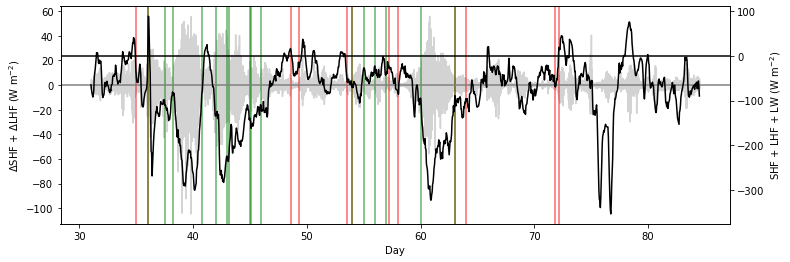

In [14]:
fig = plt.figure(figsize=[12,4])
ax = plt.gca()
ax2 = ax.twinx()
ax.plot(time_ptb, hf_ptb, color='lightgray', label='$\Delta$HF SD')
ax2.plot(time_smt, hf_smt, color='k', label='ERA5')
for key in case_start.keys():
    if key.startswith('C'):
        color = 'r'
    elif key.startswith('P'):
        color = 'g'
    ax.axvline(x=case_start[key], color=color, alpha=0.6)
    ax.axvline(x=case_end[key], color=color, alpha=0.6)
ax.set_xlabel('Day')
ax.axhline(y=0, color='gray')
ax2.set_ylabel('SHF + LHF + LW (W m$^{-2}$)')
ax2.axhline(y=0, color='k')
ax.set_ylabel('$\Delta $SHF + $\Delta$LHF (W m$^{-2}$)')

(1285, 1)


Text(0, 0.5, '$\\tau$ (N m$^{-2}$)')

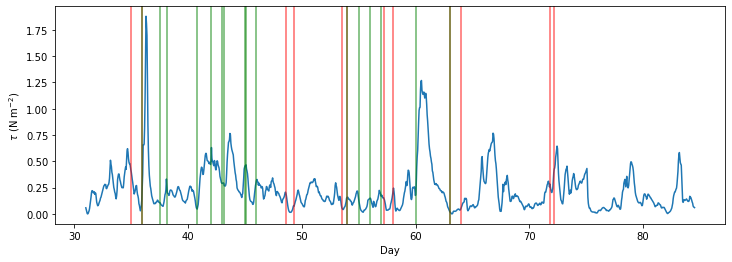

In [15]:
tau_smt =  era5_met['tau']
print(tau_smt.shape)
fig = plt.figure(figsize=[12,4])
plt.plot(time_smt, tau_smt)
for key in case_start.keys():
    if key.startswith('C'):
        color = 'r'
    elif key.startswith('P'):
        color = 'g'
    plt.axvline(x=case_start[key], color=color, alpha=0.6)
    plt.axvline(x=case_end[key], color=color, alpha=0.6)
plt.xlabel('Day')
plt.ylabel('$\\tau$ (N m$^{-2}$)')

In [16]:
for key in case_start.keys():
    print(key)
    vmax = hf_ptb[idx_start_ptb[key]:idx_end_ptb[key]].max()
    vmin = hf_ptb[idx_start_ptb[key]:idx_end_ptb[key]].min()
    vref = hf_smt[idx_start_smt[key]:idx_end_smt[key]].mean()
    tauref = tau_smt[idx_start_smt[key]:idx_end_smt[key]].mean()
    print('dhf_pos = {:6.1f}, dhf_neg = {:6.1f}, hf_ref = {:6.1f}, tau_ref = {:6.2f}'.format(vmax, vmin, vref, tauref))

C1
dhf_pos =   16.7, dhf_neg =  -25.3, hf_ref =  -68.9, tau_ref =   0.20
C4
dhf_pos =    3.4, dhf_neg =   -3.0, hf_ref =  -26.2, tau_ref =   0.07
C5
dhf_pos =    8.8, dhf_neg =   -7.8, hf_ref =  -56.4, tau_ref =   0.07
C6
dhf_pos =    9.3, dhf_neg =   -9.0, hf_ref =  -47.1, tau_ref =   0.08
C7
dhf_pos =    8.3, dhf_neg =   -8.6, hf_ref = -109.0, tau_ref =   0.03
C8
dhf_pos =    6.1, dhf_neg =   -9.0, hf_ref =  -45.7, tau_ref =   0.26
P1
dhf_pos =   29.7, dhf_neg =  -42.9, hf_ref = -113.2, tau_ref =   0.49
P2
dhf_pos =   55.6, dhf_neg = -104.6, hf_ref = -209.1, tau_ref =   0.18
P3
dhf_pos =   44.4, dhf_neg =  -49.6, hf_ref = -218.2, tau_ref =   0.45
P4
dhf_pos =   40.8, dhf_neg =  -36.4, hf_ref = -170.8, tau_ref =   0.40
P5
dhf_pos =   23.2, dhf_neg =  -20.9, hf_ref = -134.3, tau_ref =   0.22
P6
dhf_pos =   16.8, dhf_neg =  -18.1, hf_ref =  -73.9, tau_ref =   0.14
P7
dhf_pos =   14.5, dhf_neg =  -15.5, hf_ref =  -30.9, tau_ref =   0.13
P8
dhf_pos =   55.8, dhf_neg =  -55.7, hf_ref = -21